In [4]:
##import all the required libraries
import pandas as pd
import numpy as np
import unicodedata
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from string import ascii_lowercase
from nltk.stem import WordNetLemmatizer
from collections import Counter
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets
import operator
import matplotlib.pyplot as plt
from collections import Counter
from string import ascii_lowercase
import unicodedata
import nltk
import re
from nltk.stem import PorterStemmer
from gensim.models import word2vec
from sklearn import manifold
import itertools
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim import models
from gensim import similarities
import heapq

In [52]:
df_ingre = pd.read_csv('recipe/recipe_ingredient.csv', encoding="cp949")
df_basic = pd.read_csv('recipe/recipe_basic.csv', encoding="cp949")

df_tmp=df_ingre[['RECIPE_ID','IRDNT_NM']]
df_tmp_arr=[[]for i in range(538)]
num=0
for i in df_tmp['IRDNT_NM'] :
    df_tmp_arr[df_tmp['RECIPE_ID'][num]].append(i)
    num+=1
    
df_tmp_arr.pop(0)
num=0
for i in df_tmp_arr :
    df_tmp_arr[num] = list(set(df_tmp_arr[num]))
    num+=1
    
ingre_dict = {}

for i in range(1, 538, 1):
    ingre_dict[str(i)] = df_tmp_arr[i-1]

ingre_dict

{'1': ['다진파',
  '계란',
  '양지머리',
  '국간장',
  '도라지',
  '안심',
  '고추장',
  '참기름',
  '고사리',
  '다진마늘',
  '청포묵',
  '콩나물',
  '미나리',
  '숙주',
  '설탕',
  '쌀',
  '소금'],
 '2': ['수수', '차조', '팥', '콩', '찹쌀', '멥쌀', '소금'],
 '3': ['다진파',
  '참기름',
  '당근',
  '부추',
  '진간장',
  '밥',
  '홍고추',
  '호박',
  '다진마늘',
  '표고버섯',
  '돼지고기',
  '통후추',
  '청고추',
  '당면',
  '소금'],
 '4': ['쇠고기', '참기름', '깨소금', '진간장', '콩나물', '고춧가루', '파', '마늘', '통후추', '쌀', '소금'],
 '5': ['물', '계핏가루', '물엿', '흑설탕', '대추', '깐밤', '간장', '잣', '흰설탕', '찹쌀', '식용유'],
 '6': ['물', '청동호박', '팥', '찹쌀', '설탕', '소금'],
 '7': ['물', '소금', '설탕', '쌀', '흑임자'],
 '8': ['쇠고기', '밥', '통후추', '완두콩', '카레가루', '감자', '우유', '당근', '소금', '양파'],
 '9': ['물',
  '전분',
  '계란',
  '밥',
  '청피망',
  '오이',
  '다시마',
  '후춧가루',
  '쌈장',
  '멸치',
  '홍피망',
  '당근',
  '소금',
  '양파'],
 '10': ['물', '참기름', '국간장', '실파', '양념장', '홍고추', '감자', '멸치', '밀가루', '소금', '애호박'],
 '11': ['쇠고기',
  '계란',
  '쇠고기육수',
  '배',
  '냉면',
  '오이',
  '동치미국물',
  '동치미무',
  '식초',
  '설탕',
  '소금'],
 '12': ['쇠고기',
  '계란',
  '깨소금',
  '참기름',
  '국수'

In [56]:
bags_of_words = [ Counter(IRDNT_NM) for IRDNT_NM in df_tmp_arr ]

[Counter({'다진파': 1,
          '계란': 1,
          '양지머리': 1,
          '국간장': 1,
          '도라지': 1,
          '안심': 1,
          '고추장': 1,
          '참기름': 1,
          '고사리': 1,
          '다진마늘': 1,
          '청포묵': 1,
          '콩나물': 1,
          '미나리': 1,
          '숙주': 1,
          '설탕': 1,
          '쌀': 1,
          '소금': 1}),
 Counter({'수수': 1, '차조': 1, '팥': 1, '콩': 1, '찹쌀': 1, '멥쌀': 1, '소금': 1}),
 Counter({'다진파': 1,
          '참기름': 1,
          '당근': 1,
          '부추': 1,
          '진간장': 1,
          '밥': 1,
          '홍고추': 1,
          '호박': 1,
          '다진마늘': 1,
          '표고버섯': 1,
          '돼지고기': 1,
          '통후추': 1,
          '청고추': 1,
          '당면': 1,
          '소금': 1}),
 Counter({'쇠고기': 1,
          '참기름': 1,
          '깨소금': 1,
          '진간장': 1,
          '콩나물': 1,
          '고춧가루': 1,
          '파': 1,
          '마늘': 1,
          '통후추': 1,
          '쌀': 1,
          '소금': 1}),
 Counter({'물': 1,
          '계핏가루': 1,
          '물엿': 1,
          '흑설탕': 

In [57]:
#Find sum of every ingredient using Counter()
sumbags = sum(bags_of_words, Counter())


# Finally, plot the 10 most used ingredients
clean_df = pd.DataFrame.from_dict(sumbags, orient='index').reset_index()
clean_df = clean_df.rename(columns={'index':'ingredient', 0:'count'})
clean_df.to_csv('ingredient_clean.csv')

top_ing = clean_df.sort_values('count', ascending=False)

In [58]:
clean_df.sort_by(["count"])

,ingredient,count
0,다진파,109
1,계란,90
2,양지머리,2
3,국간장,24
4,도라지,9
...,...,...
639,노른자,1
640,건블루베리,1
641,중새우,1
642,콩비지,1


In [59]:
ingr_only_dict = clean_df['ingredient'].to_dict()

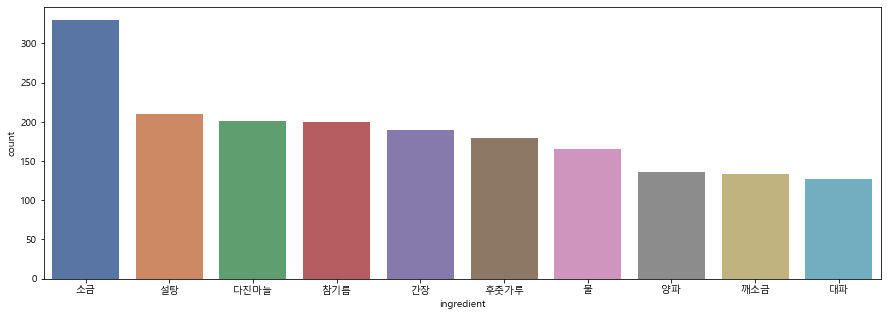

In [62]:
plt.rc('font', family='Malgun Gothic')
#Plot top ingredients using bag of words
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x = 'ingredient', y = 'count', data = top_ing.head(10))
sns.set_palette("deep")
plt.show()
fig.savefig('ingredient_count_bag_of_words.png')

In [65]:
#Get all clean ingredients in list format per recipe
ingr_list = []
for IRDNT_NM in df_tmp_arr:
    ingr_list.append(IRDNT_NM)

In [67]:
print (ingr_list[0])

['다진파', '계란', '양지머리', '국간장', '도라지', '안심', '고추장', '참기름', '고사리', '다진마늘', '청포묵', '콩나물', '미나리', '숙주', '설탕', '쌀', '소금']


In [68]:
def pmi(dff, x, y):
    df = dff.copy()
    df['f_x'] = df.groupby(x)[x].transform('count')
    df['f_y'] = df.groupby(y)[y].transform('count')
    df['f_xy'] = df.groupby([x, y])[x].transform('count')
    df['pmi'] = np.log(len(df.index) * df['f_xy'] / (df['f_x'] * df['f_y']) )
    return df

In [70]:
#PMI Calculation starts
#Point-wise mutual information to understand which ingredients go together and which ones don't

#Create combinations of ingredients
start_time = time.time()

l = []
for K in range(len(ingr_list)):
    for L in range(2,3):
        for subset in itertools.combinations(ingr_list[K], L):
            l.append(sorted(subset))       
#print("--- %s seconds ---" % (time.time() - start_time))

In [72]:
print (l[0])

['계란', '다진파']


In [73]:
#Function - Point-wise mutual information
def pmi(dff, x, y):
    df = dff.copy()
    df['f_x'] = df.groupby(x)[x].transform('count')
    df['f_y'] = df.groupby(y)[y].transform('count')
    df['f_xy'] = df.groupby([x, y])[x].transform('count')
    df['pmi'] = np.log(len(df.index) * df['f_xy'] / (df['f_x'] * df['f_y']) )
    return df

In [75]:
#Convert list of tuples to dataframe
df = pd.DataFrame(l, columns = ['Ingredient1','Ingredient2'])
print (df.count())

#Eliminate rows where Ingredient1 = Ingredient2
df = df[df['Ingredient1'] != df['Ingredient2']]
print (df.count())

Ingredient1    32593
Ingredient2    32593
dtype: int64
Ingredient1    32593
Ingredient2    32593
dtype: int64


In [76]:
#Calculate PMI
df = pmi(df, 'Ingredient1', 'Ingredient2')
print(df.count())

Ingredient1    32593
Ingredient2    32593
f_x            32593
f_y            32593
f_xy           32593
pmi            32593
dtype: int64


In [77]:
df

,Ingredient1,Ingredient2,f_x,f_y,f_xy,pmi
0,계란,다진파,947,419,15,0.208733
1,다진파,양지머리,880,20,1,0.616199
2,국간장,다진파,255,419,10,1.115303
3,다진파,도라지,880,44,5,1.437179
4,다진파,안심,880,12,1,1.127024
...,...,...,...,...,...,...
32588,소금,후추,1360,212,15,0.528077
32589,배추,후추,81,212,1,0.640817
32590,밀가루,소금,347,1942,46,0.799696
32591,밀가루,배추,347,95,2,0.681798


In [79]:
#Eliminate rows for the same ingredient combinations
print (df.pmi.count())
df = df.drop_duplicates()
print (df.pmi.count())

#Sort df
df = df.sort_values('pmi',ascending='false')
df.head()

32593
11673


,Ingredient1,Ingredient2,f_x,f_y,f_xy,pmi
9374,깨소금,후추,1252,212,1,-2.097231
8825,고추장,표고버섯,741,664,2,-2.021283
701,간장,통후추,2175,113,1,-2.020319
14403,고춧가루,토마토케첩,1253,196,1,-2.019558
23729,굴,후춧가루,111,2109,1,-1.971647


In [82]:
top_df = df.groupby('Ingredient1').head(5)
top_df.to_csv('pmi_ingredient_similarity_top.csv')

df = df.sort_values('pmi',ascending=True)
neg_df = df.groupby('Ingredient1').head(5)
neg_df.to_csv('pmi_ingredient_similarity_neg.csv')

In [83]:
top_df.to_csv('pmi_ingredient_similarity.csv', encoding = 'utf-8')

In [86]:
temp = df[(df['Ingredient1'] == '소금') | (df['Ingredient2'] == '소금') ]
temp

,Ingredient1,Ingredient2,f_x,f_y,f_xy,pmi
10547,가래떡,소금,105,1942,2,-1.140434
9040,꼬치,소금,49,1942,1,-1.071441
7418,고등어,소금,88,1942,2,-0.963810
9187,계핏가루,소금,32,1942,1,-0.645357
90,고추장,소금,741,1942,24,-0.609568
...,...,...,...,...,...,...
146,소금,차조,1360,3,1,2.078001
1527,소금,재첩,1360,3,1,2.078001
4349,배주머니,소금,2,1942,1,2.127232
31369,소고기,소금,1,1942,1,2.820379


In [87]:
def merge_two_dicts(x, y):
    z = x.copy()   # start with x's keys and values
    z.update(y)    # modifies z with y's keys and values & returns None
    return z

In [98]:
##Get clean ingredients to be used as an input for word2vec model to identify ingredient similarity.

ingr_clean_df = pd.DataFrame({'Ingredient':ingr_list})
#print ingr_clean_df
ingr_clean_df

,Ingredient
0,"[다진파, 계란, 양지머리, 국간장, 도라지, 안심, 고추장, 참기름, 고사리, 다..."
1,"[수수, 차조, 팥, 콩, 찹쌀, 멥쌀, 소금]"
2,"[다진파, 참기름, 당근, 부추, 진간장, 밥, 홍고추, 호박, 다진마늘, 표고버섯..."
3,"[쇠고기, 참기름, 깨소금, 진간장, 콩나물, 고춧가루, 파, 마늘, 통후추, 쌀,..."
4,"[물, 계핏가루, 물엿, 흑설탕, 대추, 깐밤, 간장, 잣, 흰설탕, 찹쌀, 식용유]"
...,...
532,"[노른자, 꿀, 마요네즈, 식빵, 고구마, 우유, 건블루베리, 소금]"
533,"[물, 계란, 햄, 샐러리, 밥, 카레가루, 후추, 방울토마토, 양파]"
534,"[고추장, 쪽파, 중새우, 식초, 통깨, 설탕, 소금]"
535,"[김, 두부, 참기름, 밥, 오이, 마요네즈, 어린잎채소, 가지, 식초, 통깨, 설..."


In [104]:
#pip install -U gensim
#Implementing word2vec to get the recipes which are similar to each other

num_features = 300   # Word vector dimensionality                      
context = 1        # Context window size; 
downsampling = 1e-3   # threshold for configuring which higher-frequency words are randomly downsampled

# Initialize and train the model 
model = word2vec.Word2Vec(ingr_list, vector_size=num_features, window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

<ipython-input-104-8f38cba29e2a>:13: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


In [105]:
flatten_list = []
for sublist in ingr_list:
    for item in sublist:
        if item not in flatten_list:
            flatten_list.append(item)

In [109]:
most_sim_list = []
corpus_sim_dict = {}
input_list = []
for i in flatten_list:
    try: 
        if len(i) > 0:
            #print i
            corpus_sim_dict.update({i:model.wv.most_similar(i)})
    except KeyError:
        pass

In [116]:
sim_df = pd.DataFrame([])
for key,value in corpus_sim_dict.items():
    for i in value:
        sim_df = sim_df.append(pd.DataFrame({'Ingredient': key, 'Similar Ingredient':i[0], 'Word2Vec Value': i[1] }, index=[0]), ignore_index=True)

In [117]:
sim_df.head()

,Ingredient,Similar Ingredient,Word2Vec Value
0,다진파,다진마늘,0.966074
1,다진파,참기름,0.964665
2,다진파,홍고추,0.963974
3,다진파,소금,0.963502
4,다진파,후춧가루,0.962543


In [165]:
from gensim.models.word2vec import Word2Vec
word2vecTSNE = Word2Vec(
    sg=1,
    vector_size=num_features, window = context, sample = downsampling,
    min_count=3
)
word2vecTSNE.build_vocab(ingr_list)

In [180]:
word2vecTSNE.train(ingr_list, total_examples= word2vecTSNE.corpus_count, epochs=word2vecTSNE.epochs)

(2586862, 5853000)

In [181]:
import os
if not os.path.exists("trained"):
    os.makedirs("trained")
word2vecTSNE.save(os.path.join("trained", "word2vecTSNE.w2v"))
word2vecTSNE = word2vec.Word2Vec.load(os.path.join("trained", "word2vecTSNE.w2v"))


In [182]:
from sklearn.cluster import KMeans
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [185]:
all_word_vectors_matrix = word2vecTSNE.wv.vectors
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [187]:
#Plot the big picture

points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[word2vecTSNE.wv.key_to_index[word]])
            for word in word2vecTSNE.wv.key_to_index
        ]
    ],
    columns=["word", "x", "y"]
)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\User\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\User\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


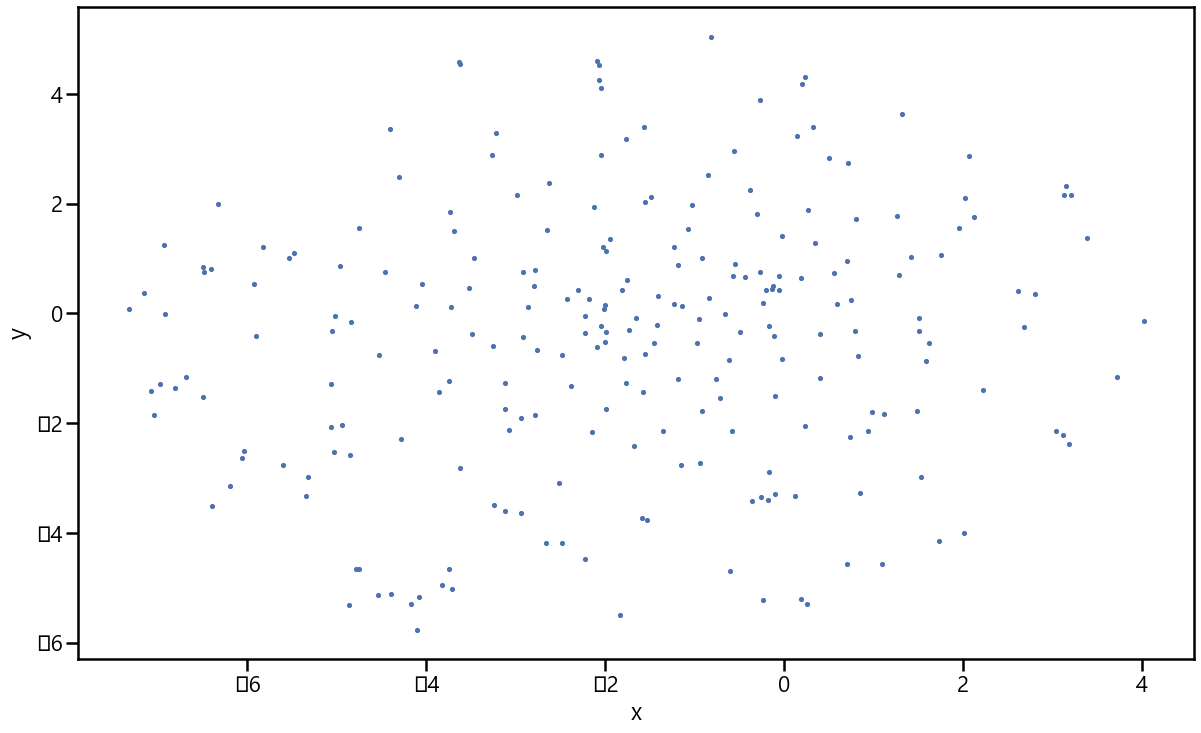

In [188]:
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(20, 12))
plt.show()

In [189]:
#Zoom in to some interesting places


def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    ax = slice.plot.scatter("x", "y", s=35, figsize=(100, 80))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

In [190]:
points.head(10)
points.to_csv('word2vec_tse.csv')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\User\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\User\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


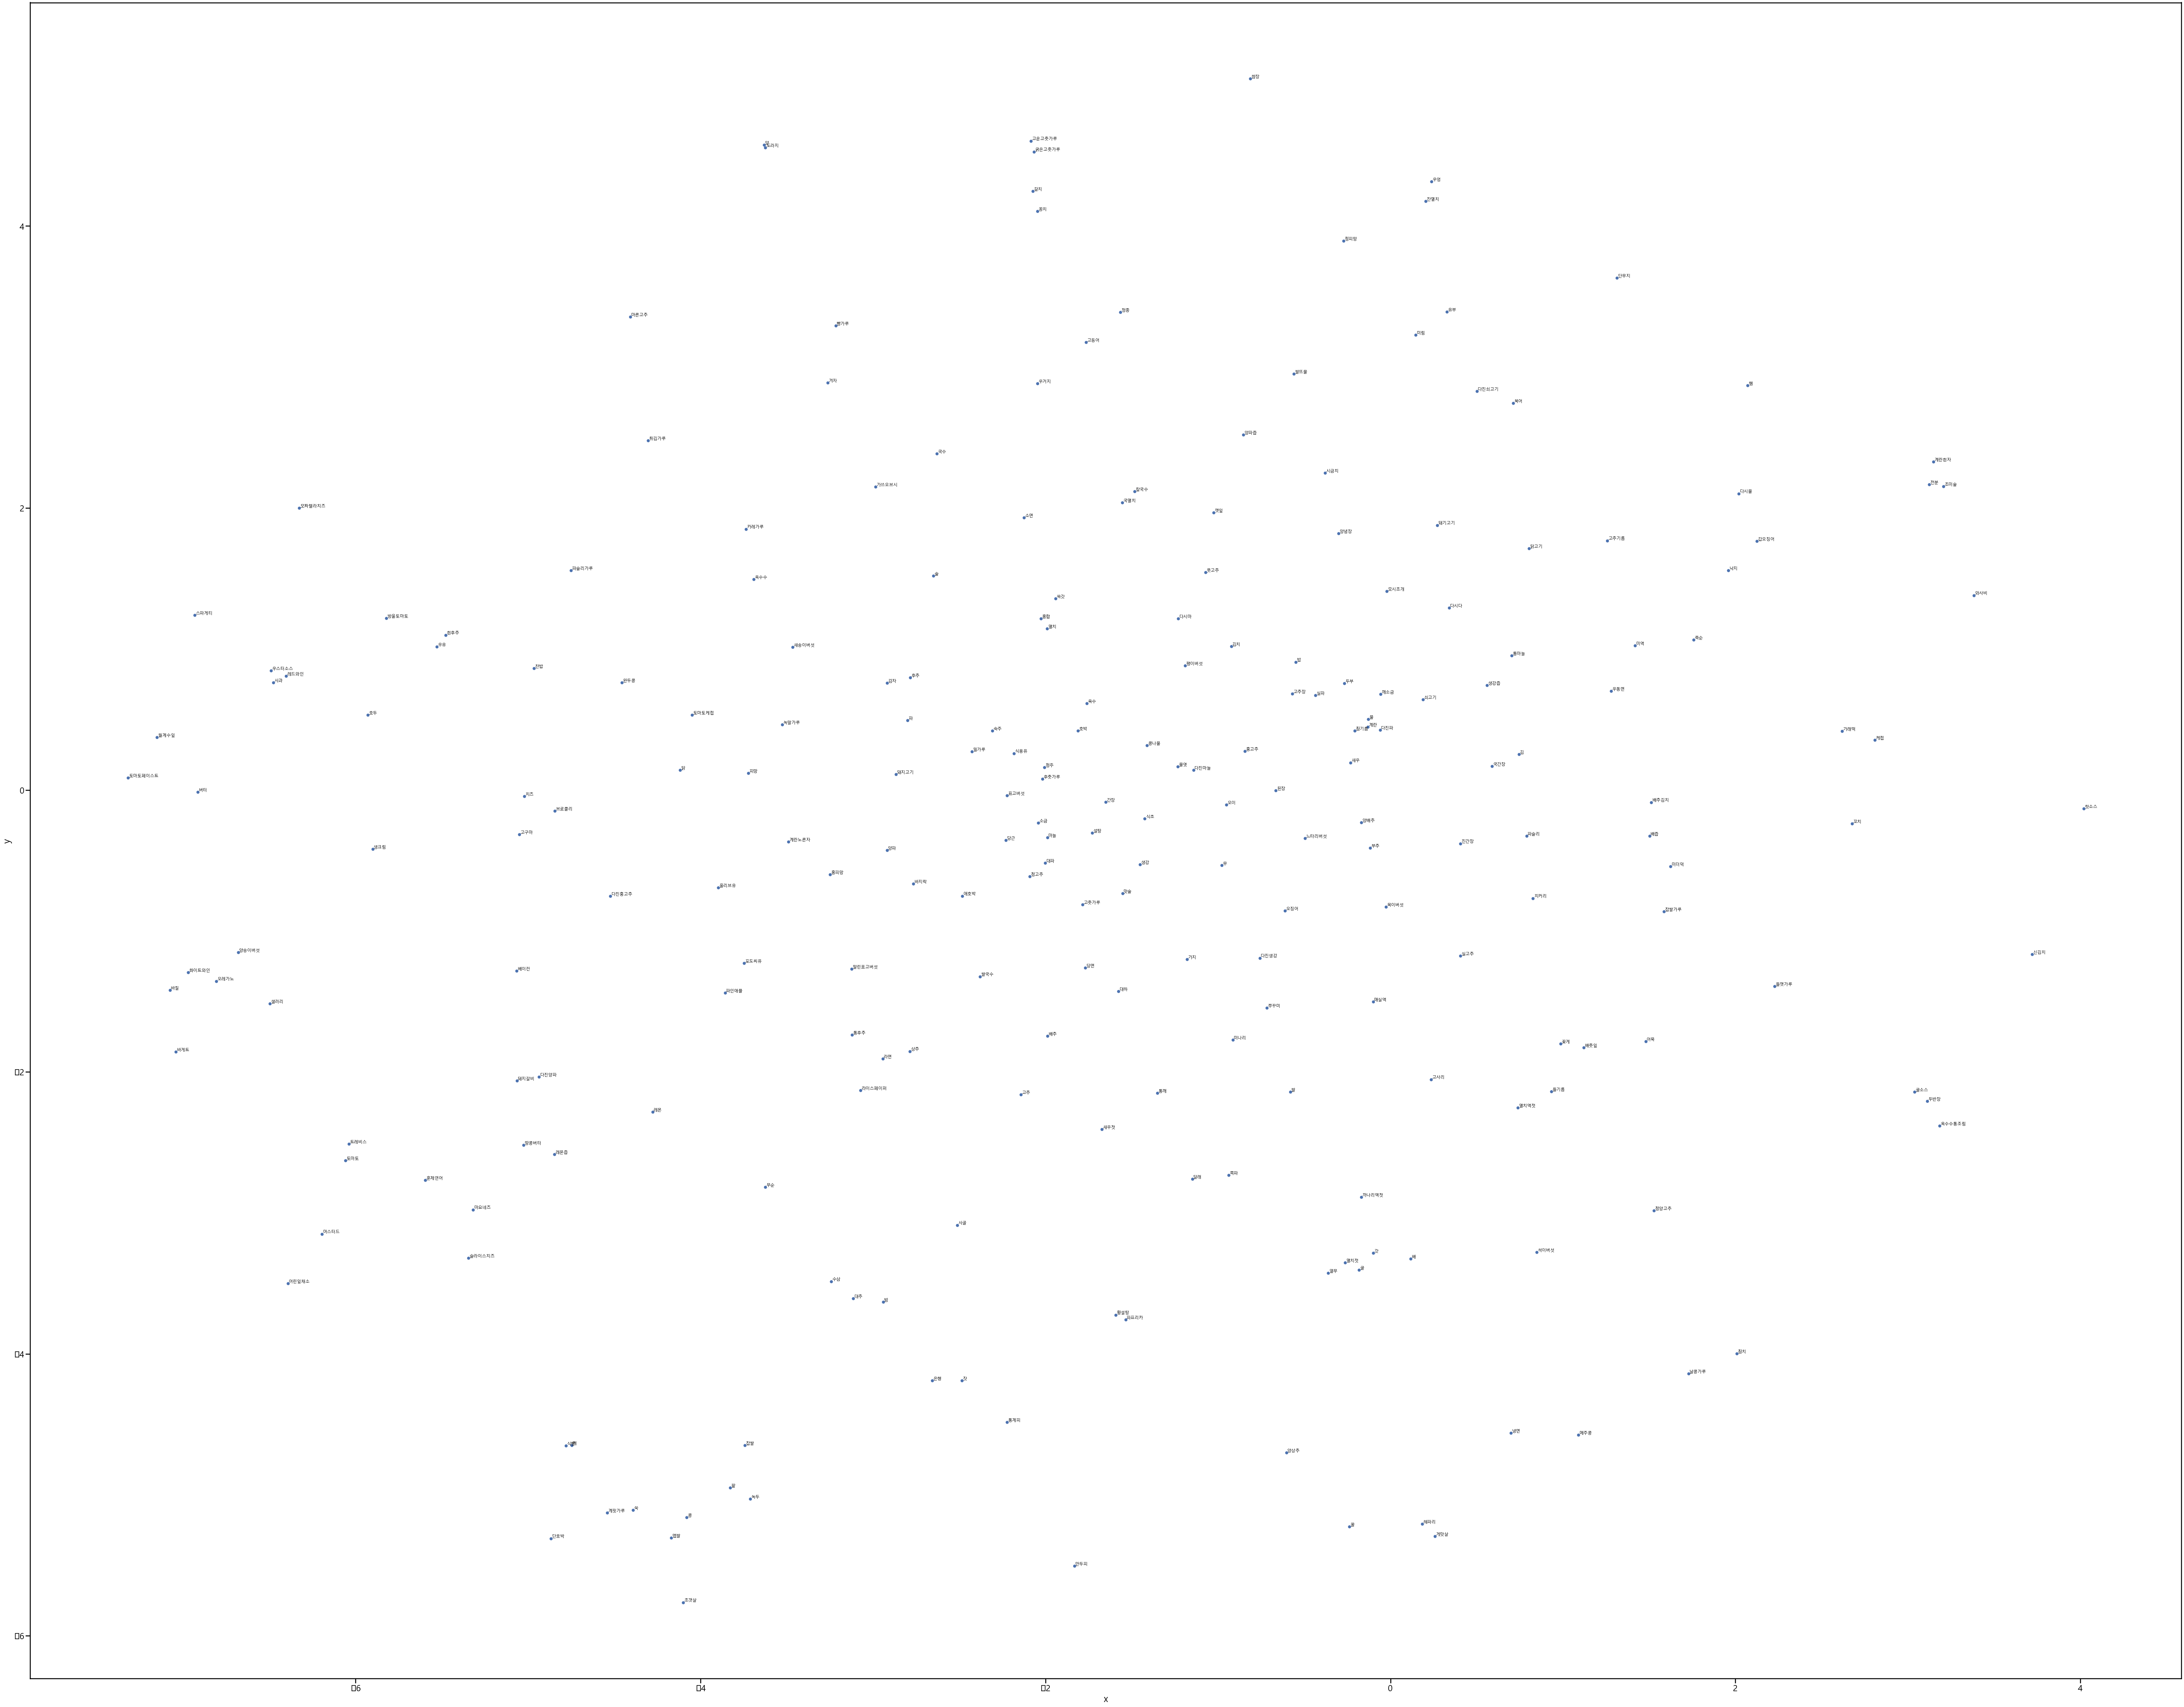

In [191]:
plot_region(x_bounds=(-40,40), y_bounds=(-40, 40))

In [192]:
sns.set_context("poster")
plt.show()

In [193]:
sim_df.to_csv('word2vec_ingredient_similarity.csv',encoding='utf-8')

In [194]:
df = pd.read_csv('word2vec_ingredient_similarity.csv')
df = df.sort_values('Word2Vec Value',ascending=False)
top_df = df.groupby('Ingredient').head(5)
top_df.to_csv('word2vec_ingredient_similarity_top.csv')

In [214]:
model.wv.most_similar('마늘')

[('다진마늘', 0.9815431833267212),
 ('소금', 0.978302001953125),
 ('설탕', 0.9779670238494873),
 ('간장', 0.9777699708938599),
 ('무', 0.9773010015487671),
 ('참기름', 0.977077066898346),
 ('후춧가루', 0.9764681458473206),
 ('고춧가루', 0.9749871492385864),
 ('대파', 0.9746109247207642),
 ('홍고추', 0.973713219165802)]

In [203]:
#Create a dictionary for all the ingredients in the recipe list

dictionary = corpora.Dictionary(ingr_list)
#print(dictionary)
#print(dictionary.token2id)
print (dictionary.token2id)

{'계란': 0, '고사리': 1, '고추장': 2, '국간장': 3, '다진마늘': 4, '다진파': 5, '도라지': 6, '미나리': 7, '설탕': 8, '소금': 9, '숙주': 10, '쌀': 11, '안심': 12, '양지머리': 13, '참기름': 14, '청포묵': 15, '콩나물': 16, '멥쌀': 17, '수수': 18, '차조': 19, '찹쌀': 20, '콩': 21, '팥': 22, '당근': 23, '당면': 24, '돼지고기': 25, '밥': 26, '부추': 27, '진간장': 28, '청고추': 29, '통후추': 30, '표고버섯': 31, '호박': 32, '홍고추': 33, '고춧가루': 34, '깨소금': 35, '마늘': 36, '쇠고기': 37, '파': 38, '간장': 39, '계핏가루': 40, '깐밤': 41, '대추': 42, '물': 43, '물엿': 44, '식용유': 45, '잣': 46, '흑설탕': 47, '흰설탕': 48, '청동호박': 49, '흑임자': 50, '감자': 51, '양파': 52, '완두콩': 53, '우유': 54, '카레가루': 55, '다시마': 56, '멸치': 57, '쌈장': 58, '오이': 59, '전분': 60, '청피망': 61, '홍피망': 62, '후춧가루': 63, '밀가루': 64, '실파': 65, '애호박': 66, '양념장': 67, '냉면': 68, '동치미국물': 69, '동치미무': 70, '배': 71, '쇠고기육수': 72, '식초': 73, '국수': 74, '겨자': 75, '다진생강': 76, '대파': 77, '열무': 78, '찹쌀가루': 79, '깻잎': 80, '상추': 81, '계란흰자': 82, '녹말가루': 83, '멸칫국물': 84, '새우': 85, '오징어': 86, '죽순': 87, '청주': 88, '홍합': 89, '김치': 90, '두부': 91, '만두피': 92, '육수': 93, '모시조개': 94, '

In [269]:
#Applying doc2bow on the dictionary of ingredients, which converts the ingredient to a number in every recipe
#This input format is needed for TfIdfmodel
bow_corpus = [dictionary.doc2bow(text) for text in ingr_list]
bow_corpus[1]

[(9, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]

In [205]:
# train the model
tfidf = models.TfidfModel(bow_corpus)

In [206]:
corpus_tfidf = tfidf[bow_corpus]

In [208]:
#print corpus for the first recipe
for i in corpus_tfidf:
    print (i)
    break

[(0, 0.12536764970378156), (1, 0.28697976041062095), (2, 0.1440166236619011), (3, 0.21813805449298102), (4, 0.06897253027590529), (5, 0.11192410974507322), (6, 0.28697976041062095), (7, 0.18228460980980854), (8, 0.0658981447412047), (9, 0.034174552819037966), (10, 0.27958479578046197), (11, 0.2511263157274484), (12, 0.4411969064873013), (13, 0.3925468135019746), (14, 0.06932259208829587), (15, 0.3925468135019746), (16, 0.21527287104427598)]


In [209]:
#print tfidf results for the first recipe
print(tfidf[bow_corpus[1]])

[(9, 0.041711279124097986), (17, 0.3412433665893121), (18, 0.4791175994008815), (19, 0.5384967994351779), (20, 0.3124191099167564), (21, 0.38500379402370133), (22, 0.3412433665893121)]


In [210]:
#Use similarities library from gensim to get the cosine similarity of the tfidf results

index = similarities.MatrixSimilarity(tfidf[bow_corpus])
index.save('ingr.index')
index = similarities.MatrixSimilarity.load('ingr.index')

sims = index[corpus_tfidf]
sims_list = [(i,j) for i,j in enumerate(sims)]

#Creating a list to hold the cosine similarity results for tfidf
tf_idf_list = []

for i,j in enumerate(sims_list):
    tf_idf_list.append(sims_list[i][1])

In [221]:
#Create recipe dict- to be used in creating dataframe in next step - used to decode recipe id
recipe_dict = {k: v for k, v in enumerate(df_basic.RECIPE_NM_KO)}
recipe_dict

{0: '나물비빔밥',
 1: '오곡밥',
 2: '잡채밥',
 3: '콩나물밥',
 4: '약식',
 5: '호박죽',
 6: '흑임자죽',
 7: '카레라이스',
 8: '오므라이스',
 9: '감자수제비',
 10: '냉면',
 11: '동치미막국수',
 12: '열무김치냉면',
 13: '채소국수',
 14: '해물국수',
 15: '만둣국',
 16: '다시마냉국',
 17: '두부국',
 18: '두부조개탕',
 19: '무맑은국',
 20: '미역국',
 21: '미역냉국',
 22: '생태국',
 23: '연어까르파치오',
 24: '오이냉국',
 25: '해산물샐러드',
 26: '재첩국',
 27: '구운감자와도미구이',
 28: '쇠고기산적',
 29: '쇠고기양송이볶음',
 30: '팥국수',
 31: '죽순표고버섯볶음나물',
 32: '부추표고버섯볶음',
 33: '두부드레싱과 채소샐러드',
 34: '콩나물무침',
 35: '우엉조림',
 36: '바질토마토두부샐러드',
 37: '멸치볶음',
 38: '갈치무조림',
 39: '닭불고기',
 40: '두부다시마말이',
 41: '팥칼국수',
 42: '콩나물잡채',
 43: '양배추말이찜',
 44: '마늘장아찌',
 45: '오징어불고기',
 46: '생선탕수',
 47: '갈비구이',
 48: '돈까스',
 49: '갈비찜',
 50: '제육보쌈',
 51: '홍합꼬치구이',
 52: '청국장찌개',
 53: '순두부찌개',
 54: '동태찌개',
 55: '김치찌개',
 56: '콩비지찌개',
 57: '북어국',
 58: '유부초밥',
 59: '오색주먹밥도시락',
 60: '해파리냉채',
 61: '통배추김치',
 62: '열무김치',
 63: '오이소박이',
 64: '나박김치',
 65: '총각김치',
 66: '굴깍두기',
 67: '동치미',
 68: '갓김치',
 69: '꽃게찌개',
 70: '감자탕',
 71: '아구탕',
 72: '조기매운탕',
 73: '알탕

In [222]:
#Use cosine similarity results to get the top 10 similar recipes for every recipe.
tf_idf_top  = []
similar_recipes_df = pd.DataFrame([])
same_item = []

#Get only top 11 largest values from the tf_idf_list - 1 recipe will be the same as itself (hence 12)
for i,item in enumerate(tf_idf_list):
    tf_idf_top.append(heapq.nlargest(11,enumerate(item), key=lambda x: x[1]))

#Remove the recipe value with 1.0 similarity - since it is the same recipe
for i,list_item in enumerate(tf_idf_top):
    for j,k in enumerate(list_item):
        if tf_idf_top[i][j][1] != 1.0:
            similar_recipes_df = similar_recipes_df.append(pd.DataFrame({'Similar_Recipe_ID': recipe_dict.get(tf_idf_top[i][j][0]),'TF-IDF Value': tf_idf_top[i][j][1],'Recipe_ID': recipe_dict.get(i)}, index=[0]), ignore_index=True)

In [223]:
similar_recipes_df.to_csv('similar_recipes_top_10_tf_idf.csv',encoding='utf-8')

In [224]:
similar_recipes_df = pd.read_csv('similar_recipes_top_10_tf_idf.csv')
similar_recipes_df = similar_recipes_df[similar_recipes_df['Recipe_ID'] != similar_recipes_df['Similar_Recipe_ID']]
print (similar_recipes_df.count())

Unnamed: 0           5366
Similar_Recipe_ID    5366
TF-IDF Value         5366
Recipe_ID            5366
dtype: int64


In [225]:
similar_recipes_df

,Unnamed: 0,Similar_Recipe_ID,TF-IDF Value,Recipe_ID
1,1,사색나물,0.345135,나물비빔밥
2,2,상추겉절이비빔밥,0.316848,나물비빔밥
3,3,콩나물미나리무침,0.292764,나물비빔밥
4,4,돌솥비빔밥,0.284462,나물비빔밥
5,5,숙주미나리무침,0.281138,나물비빔밥
...,...,...,...,...
5449,5449,꽃만두국(완당국),0.168596,콩비지동그랑땡
5450,5450,갈비탕,0.164151,콩비지동그랑땡
5451,5451,배추겉절이,0.143484,콩비지동그랑땡
5452,5452,낙지볶음,0.142591,콩비지동그랑땡


In [226]:
similar_recipes_df.to_csv('similar_recipes_tf_idf.csv',encoding='utf-8')

In [227]:
similar_recipes_df

,Unnamed: 0,Similar_Recipe_ID,TF-IDF Value,Recipe_ID
1,1,사색나물,0.345135,나물비빔밥
2,2,상추겉절이비빔밥,0.316848,나물비빔밥
3,3,콩나물미나리무침,0.292764,나물비빔밥
4,4,돌솥비빔밥,0.284462,나물비빔밥
5,5,숙주미나리무침,0.281138,나물비빔밥
...,...,...,...,...
5449,5449,꽃만두국(완당국),0.168596,콩비지동그랑땡
5450,5450,갈비탕,0.164151,콩비지동그랑땡
5451,5451,배추겉절이,0.143484,콩비지동그랑땡
5452,5452,낙지볶음,0.142591,콩비지동그랑땡


In [249]:
#Create cosine similarity matrix for all recipes 27637*27637
#Since this is a huge matrix, the top 10 similar recipe logic is a better option.

names = [i for i in range(1,len(tf_idf_list))]
final_df = pd.DataFrame.from_dict(zip(names,tf_idf_list))

In [266]:
final_df.head()

,0,1
0,1,"[0.99999994, 0.0014254643, 0.033768497, 0.1980..."
1,2,"[0.0014254643, 1.0, 0.0020696677, 0.0024465732..."
2,3,"[0.033768497, 0.0020696677, 0.99999994, 0.2848..."
3,4,"[0.19803128, 0.0024465732, 0.28489417, 1.0, 0...."
4,5,"[0.0, 0.083098724, 0.0, 0.0, 1.0, 0.12700248, ..."


In [282]:
df_basic['RECIPE_ID'] = df_basic.index+1
recipe_name_df = df_basic[['RECIPE_ID','RECIPE_NM_KO']]
final_df['RECIPE_ID'] = final_df.index+1

recipe_tf_idf_df = final_df.merge(recipe_name_df,how='left', left_on='RECIPE_ID', right_on='RECIPE_ID')

In [283]:
recipe_tf_idf_df

,0,1,RECIPE_ID,RECIPE_NM_KO
0,1,"[0.99999994, 0.0014254643, 0.033768497, 0.1980...",1,나물비빔밥
1,2,"[0.0014254643, 1.0, 0.0020696677, 0.0024465732...",2,오곡밥
2,3,"[0.033768497, 0.0020696677, 0.99999994, 0.2848...",3,잡채밥
3,4,"[0.19803128, 0.0024465732, 0.28489417, 1.0, 0....",4,콩나물밥
4,5,"[0.0, 0.083098724, 0.0, 0.0, 1.0, 0.12700248, ...",5,약식
...,...,...,...,...
531,532,"[0.056351654, 0.0014639606, 0.1692405, 0.00205...",532,배추만두
532,533,"[0.0012879255, 0.0015719596, 0.0018699714, 0.0...",533,식빵고구마파이
533,534,"[0.022837494, 0.0, 0.06388645, 0.0, 0.01035777...",534,카레토마토달걀볶음밥
534,535,"[0.041695163, 0.002264081, 0.0026933053, 0.003...",535,쪽파 새우강회


In [236]:
#Create a list from tfidf results
#This will be used to identify ingredient importance within every recipe

corpus_list = []
for doc in corpus_tfidf:
    corpus_list.append(doc)

In [237]:
corpus_list[0]

[(0, 0.12536764970378156),
 (1, 0.28697976041062095),
 (2, 0.1440166236619011),
 (3, 0.21813805449298102),
 (4, 0.06897253027590529),
 (5, 0.11192410974507322),
 (6, 0.28697976041062095),
 (7, 0.18228460980980854),
 (8, 0.0658981447412047),
 (9, 0.034174552819037966),
 (10, 0.27958479578046197),
 (11, 0.2511263157274484),
 (12, 0.4411969064873013),
 (13, 0.3925468135019746),
 (14, 0.06932259208829587),
 (15, 0.3925468135019746),
 (16, 0.21527287104427598)]

In [238]:
#Create a flat list to eliminate repetition of ingredients and create a dict to hold the results

flat_list = []
for sublist in ingr_list:
    for item in sublist:
        if item not in flat_list:
            flat_list.append(item)
ing_dict =  {k: v for k, v in enumerate(flat_list)}

In [268]:
ing_dict

{0: '다진파',
 1: '계란',
 2: '양지머리',
 3: '국간장',
 4: '도라지',
 5: '안심',
 6: '고추장',
 7: '참기름',
 8: '고사리',
 9: '다진마늘',
 10: '청포묵',
 11: '콩나물',
 12: '미나리',
 13: '숙주',
 14: '설탕',
 15: '쌀',
 16: '소금',
 17: '수수',
 18: '차조',
 19: '팥',
 20: '콩',
 21: '찹쌀',
 22: '멥쌀',
 23: '당근',
 24: '부추',
 25: '진간장',
 26: '밥',
 27: '홍고추',
 28: '호박',
 29: '표고버섯',
 30: '돼지고기',
 31: '통후추',
 32: '청고추',
 33: '당면',
 34: '쇠고기',
 35: '깨소금',
 36: '고춧가루',
 37: '파',
 38: '마늘',
 39: '물',
 40: '계핏가루',
 41: '물엿',
 42: '흑설탕',
 43: '대추',
 44: '깐밤',
 45: '간장',
 46: '잣',
 47: '흰설탕',
 48: '식용유',
 49: '청동호박',
 50: '흑임자',
 51: '완두콩',
 52: '카레가루',
 53: '감자',
 54: '우유',
 55: '양파',
 56: '전분',
 57: '청피망',
 58: '오이',
 59: '다시마',
 60: '후춧가루',
 61: '쌈장',
 62: '멸치',
 63: '홍피망',
 64: '실파',
 65: '양념장',
 66: '밀가루',
 67: '애호박',
 68: '쇠고기육수',
 69: '배',
 70: '냉면',
 71: '동치미국물',
 72: '동치미무',
 73: '식초',
 74: '국수',
 75: '겨자',
 76: '찹쌀가루',
 77: '열무',
 78: '다진생강',
 79: '대파',
 80: '깻잎',
 81: '상추',
 82: '죽순',
 83: '새우',
 84: '오징어',
 85: '계란흰자',
 86: '멸칫국물',


In [240]:
dictionary.get(corpus_list[0][0][0])

'계란'

In [241]:
#Create a dataframe with tf-idf values per ingredient for every recipe.
corpus_df = pd.DataFrame([])

for i,list_item in enumerate(corpus_list):
    for j,k in enumerate(list_item):
        corpus_df = corpus_df.append(pd.DataFrame({'Ingredient': dictionary.get(corpus_list[i][j][0]),'TF-IDF Value': corpus_list[i][j][1],'Recipe_ID': i}, index=[0]), ignore_index=True)

In [242]:
corpus_df.to_csv('ingredient_tf_idf.csv')

In [247]:
df_basic['RECIPE_ID'] = df_basic.index
recipe_tf_idf_df = corpus_df.merge(df_basic,how='left', left_on='Recipe_ID', right_on='RECIPE_ID')
recipe_tf_idf_df = recipe_tf_idf_df[['Recipe_ID','RECIPE_NM_KO','Ingredient','TF-IDF Value']]
recipe_tf_idf_df.head(20)


,Recipe_ID,RECIPE_NM_KO,Ingredient,TF-IDF Value
0,0,나물비빔밥,계란,0.125368
1,0,나물비빔밥,고사리,0.286980
2,0,나물비빔밥,고추장,0.144017
3,0,나물비빔밥,국간장,0.218138
4,0,나물비빔밥,다진마늘,0.068973
5,0,나물비빔밥,다진파,0.111924
6,0,나물비빔밥,도라지,0.286980
7,0,나물비빔밥,미나리,0.182285
8,0,나물비빔밥,설탕,0.065898
9,0,나물비빔밥,소금,0.034175


In [248]:
recipe_tf_idf_df.to_csv('ingredient_recipe_tf_idf.csv',encoding='utf-8')